## BLOG POST - ANOVA 

*Please note I have chosen to use GitHub / Jupyter notebooks in substitute of Tumblr for my blog assignments

The null hypothesis is that between defaulted and non-defaulted the loans, numerous variables would be the same
between the two categories.  Some of those variables include: interest rate, debt-to-income, and revolving utilization.
    
For this exercise, when exploring my initial variables, I kept receving p-values barely above 0.  < 0.001.  Becuase of 
this, there is strong evidence against the null hypothesis, and I would reject the null hypothesis.  We wouldn't expect
data as extreme as the data we actually observed. 

In [1]:
/* =================================
   1. DATA IMPORT (on local machine) 
   ================================ */
options nosource nonotes;

proc import datafile = '/folders/myfolders/sasuser.v94/LoanStats3a.csv'
out = work.loanstats
dbms = CSV;
run;

/* We can ingore error: ERROR: Expecting page 1, got page -1 instead. */

/* =======================
   2. DATA TRANSFORMATIONS 
   ======================= */

options nosource nonotes;

/* Had to put this all in a single step and assign to existing table - in order to append onto the table for charting. */
/* DATA new; set work.loanstats; */
DATA work.loanstats; set work.loanstats;

/* ==============================================================================
   Here I need to convert some data - int_rate = 25% - needs to be adjusted to .25  
   "_d" denotes decimal format */

/* All consolidated into one step */
int_rate_d = (input(substr(int_rate,1,index(int_rate, '%')-1), 8.) / 100);


/* same with revoling utilization */
revol_util_d = (input(  substr(revol_util,1,index(revol_util, '%')-1)  , 8.) / 100);


/* =================================
    Variable Adding / Binning */
    
/* If the recoveries or collection_recovery_fee > 0 then assign a default value of 1 */
IF recoveries > 0 THEN defaulted = 1;
ELSE IF collection_recovery_fee > 0 THEN defaulted = 1;
ELSE defaulted = 0;

/* int_rate */
length int_rate_bin $20; /* Set length */
IF int_rate_d < 0.10 THEN int_rate_bin = "0% - 10%";
ELSE IF int_rate_d >= 0.10 AND int_rate_d < 0.15 THEN int_rate_bin = "10% - 15%";
ELSE IF int_rate_d >= 0.15 AND int_rate_d < 0.20 THEN int_rate_bin = "15% - 20%";
ELSE IF int_rate_d >= 0.20 AND int_rate_d < 0.25 THEN int_rate_bin = "20% - 25%";
ELSE IF int_rate_d >= 0.25 AND int_rate_d < 0.30 THEN int_rate_bin = "25% - 30%";
ELSE IF int_rate_d >= 0.30 THEN int_rate_bin = "> 30%";
ELSE int_rate_bin = "N/A"; /* Catch bad data */

/* dti - range of 0-30 */
length dti_bin $20; /* Set length */
IF dti < 1 THEN dti_bin = "0 - 1";
ELSE IF dti >= 1 AND dti < 10 THEN dti_bin = "1 - 10";
ELSE IF dti >= 10 AND dti < 20 THEN dti_bin = "10 - 20";
ELSE IF dti >= 20 AND dti < 30 THEN dti_bin = "20 - 30";
ELSE IF dti >= 30 THEN dti_bin = "> 30";
ELSE dti_bin = "N/A"; 

/* revol_util */
length revol_util_bin $20; /* Set length */
IF revol_util_d < 0.25 THEN revol_util_bin = "0% - 25%";
ELSE IF revol_util_d >= 0.25 AND revol_util_d < 0.50 THEN revol_util_bin = "25% - 50%";
ELSE IF revol_util_d >= 0.50 AND revol_util_d < 0.75 THEN revol_util_bin = "50% - 75%";
ELSE IF revol_util_d >= 0.75 AND revol_util_d <= 1 THEN revol_util_bin = "75% - 100%";
ELSE IF revol_util_d > 1 THEN revol_util_bin = "> 100%";
ELSE revol_util_bin = "N/A"; 

/* =======================
    Set some labels */
LABEL   purpose = "Purpose for Loan"
        int_rate = "interest rate"
        dti = "debt to income ratio"
        revol_util = "revolving utilization"
        int_rate_d = "interest rate"
        revol_util_d = "revolving utilization"


        int_rate_bin = "interest rate (binned)"
        dti_bin = "debt to income ratio (binned)"
        revol_util_bin = "revolving utilization (binned)"
        defaulted = "Defulted Loan";
        
PROC SORT; by id;

/* Here split out a separate data set for the defaulted loans - for analysis use later */
DATA work.loanstats_defaulted; 
   SET work.loanstats;
   
    /* Sub set the data to only recoveries */
    IF defaulted = 1;
   
RUN;

## ANOVA
<a id='binned_graphs'></a>


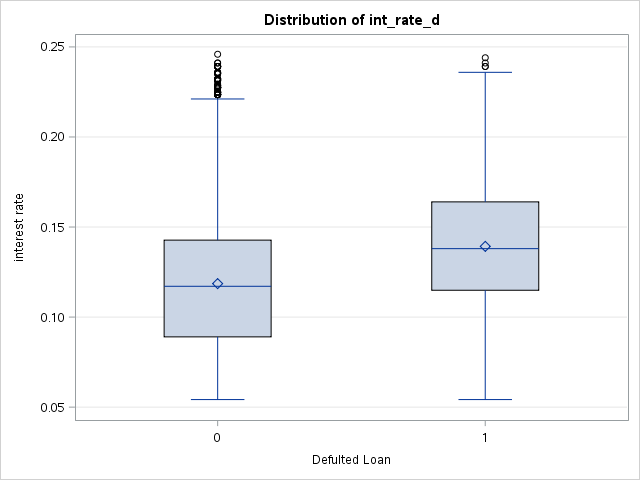

In [2]:
proc ANOVA data=work.loanstats; class defaulted;
model int_rate_d=defaulted;
means defaulted;
run;


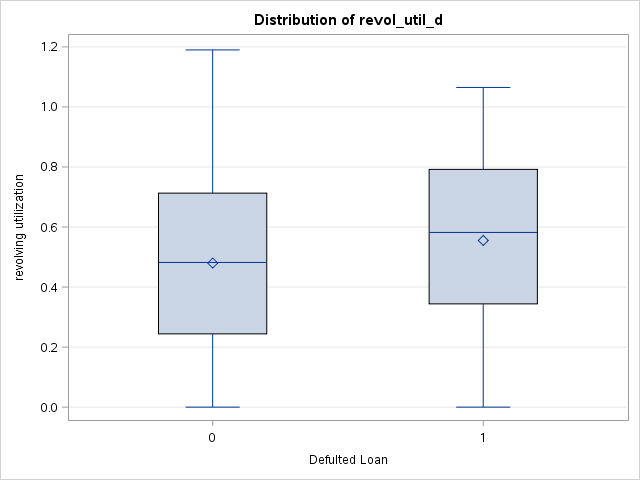

In [3]:
proc ANOVA data=work.loanstats; class defaulted;
model revol_util_d=defaulted;
means defaulted;
run;

## Post Hoc Test


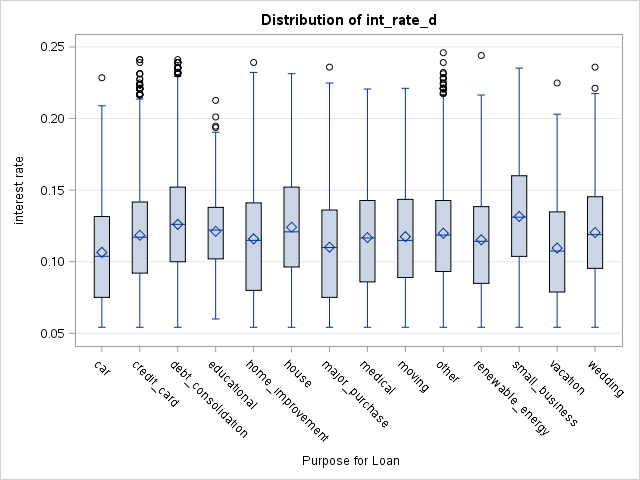

In [9]:
proc ANOVA data=work.loanstats; class Purpose;
title "ANOVA of interest rate given Purpose - DUNCAN post hoc anlysis";
model int_rate_d=Purpose;
means Purpose/DUNCAN;
run;